# Learn MobileNet v1 architecture from scratch with Pytorch

This is my first model (MobileNet v1 architecture) in Pytorch.

The link of the paper is : https://arxiv.org/pdf/1704.04861.pdf

So we get the following picture of the architecture :

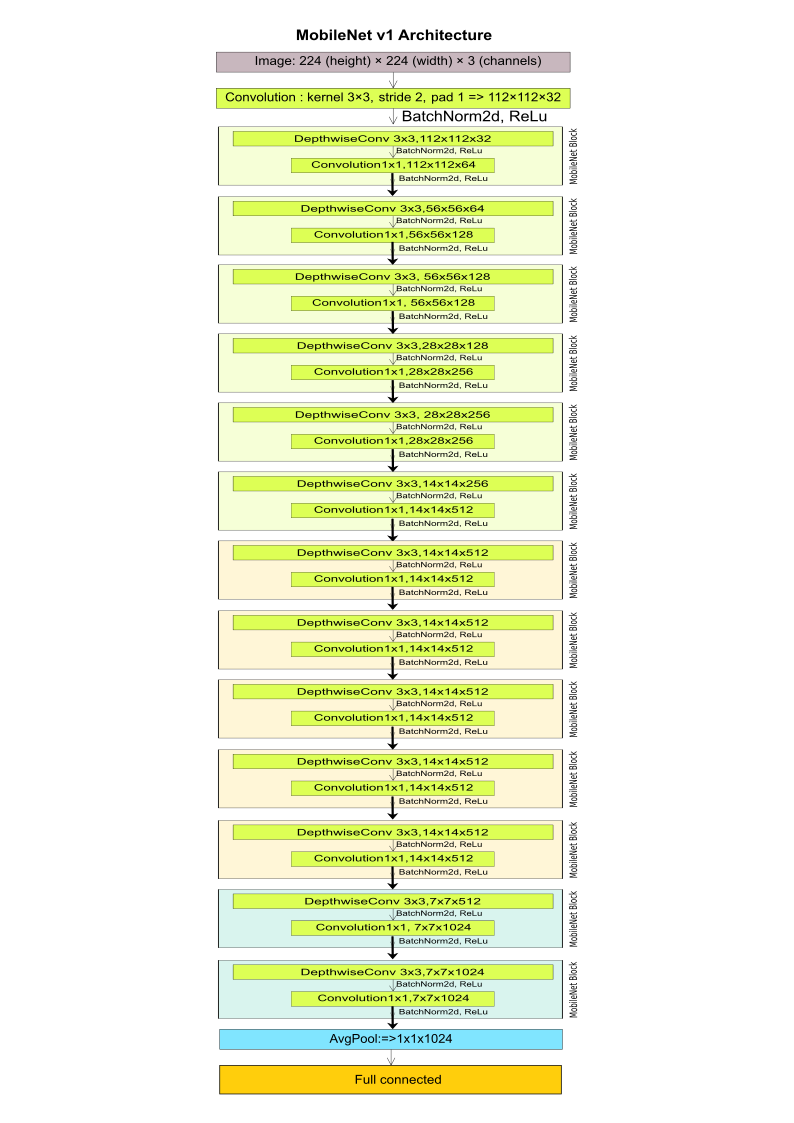

# With Pytorch

In [1]:
import torch.nn as nn
import torch
from torchsummary import summary

In [2]:
class mobilenet_block(nn.Module):
    def __init__(self, _input, _output, strides):
        super(mobilenet_block , self).__init__()
        
        self.DepthwiseConv = nn.Conv2d(_input, _input, kernel_size = (3, 3), stride = strides, padding = 1, groups = _input, bias = False) # groups give us the DepthwiseConv
        self.Conv = nn.Conv2d(_input, _output, kernel_size = (1, 1), stride = (1, 1), padding = 0, bias = False)
        self.BatchNorm_1 = nn.BatchNorm2d(_input)
        self.BatchNorm_2 = nn.BatchNorm2d(_output)
        self.Relu = nn.ReLU(inplace = True)
        
    def forward(self , x):
        
        x = self.DepthwiseConv(x)
        x = self.BatchNorm_1(x)
        x = self.Relu(x)
        
        x = self.Conv(x)
        x = self.BatchNorm_2(x)
        x = self.Relu(x)        
         
        return x

In [3]:
class Mobilenet(nn.Module):
    def __init__(self):
        super(Mobilenet, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 32, kernel_size = (3, 3), stride = (2, 2) , padding  = 1, bias = False)
        self.batch1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU(inplace = True)
        self.mobileN_1 = nn.Sequential(
                                       mobilenet_block(32, 64, 1),
                                       mobilenet_block(64, 128, 2),
                                       mobilenet_block(128, 128, 1),
                                       mobilenet_block(128, 256, 2),
                                       mobilenet_block(256, 256, 1),
                                       mobilenet_block(256, 512, 2)            
                                       )
        
        self.mobileN_2 = mobilenet_block(512, 512, 1)
                 
        self.mobileN_3 = nn.Sequential(
                                       mobilenet_block(512, 1024, 2),
                                       mobilenet_block(1024, 1024, 1),
                                       )
        self.AvgPool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(1024, 1000)
        
    def forward(self,x):
        
        x = self.conv1(x)
        x = self.batch1(x)
        x = self.relu1(x)
        x = self.mobileN_1(x)
        
        for _ in range (5):
            x = self.mobileN_2(x)        
        
        x = self.mobileN_3(x)
        x = self.AvgPool(x)
        x = x.view(-1, 1024)
        x = self.fc(x)
        
        return x

In [4]:
dev = torch.device("cuda") 

model_1 = Mobilenet().to(dev)
print(summary(model_1,(3,224,224)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
              ReLU-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
              ReLU-6         [-1, 32, 112, 112]               0
            Conv2d-7         [-1, 64, 112, 112]           2,048
       BatchNorm2d-8         [-1, 64, 112, 112]             128
              ReLU-9         [-1, 64, 112, 112]               0
  mobilenet_block-10         [-1, 64, 112, 112]               0
           Conv2d-11           [-1, 64, 56, 56]             576
      BatchNorm2d-12           [-1, 64, 56, 56]             128
             ReLU-13           [-1, 64, 56, 56]               0
           Conv2d-14          [-1, 128,

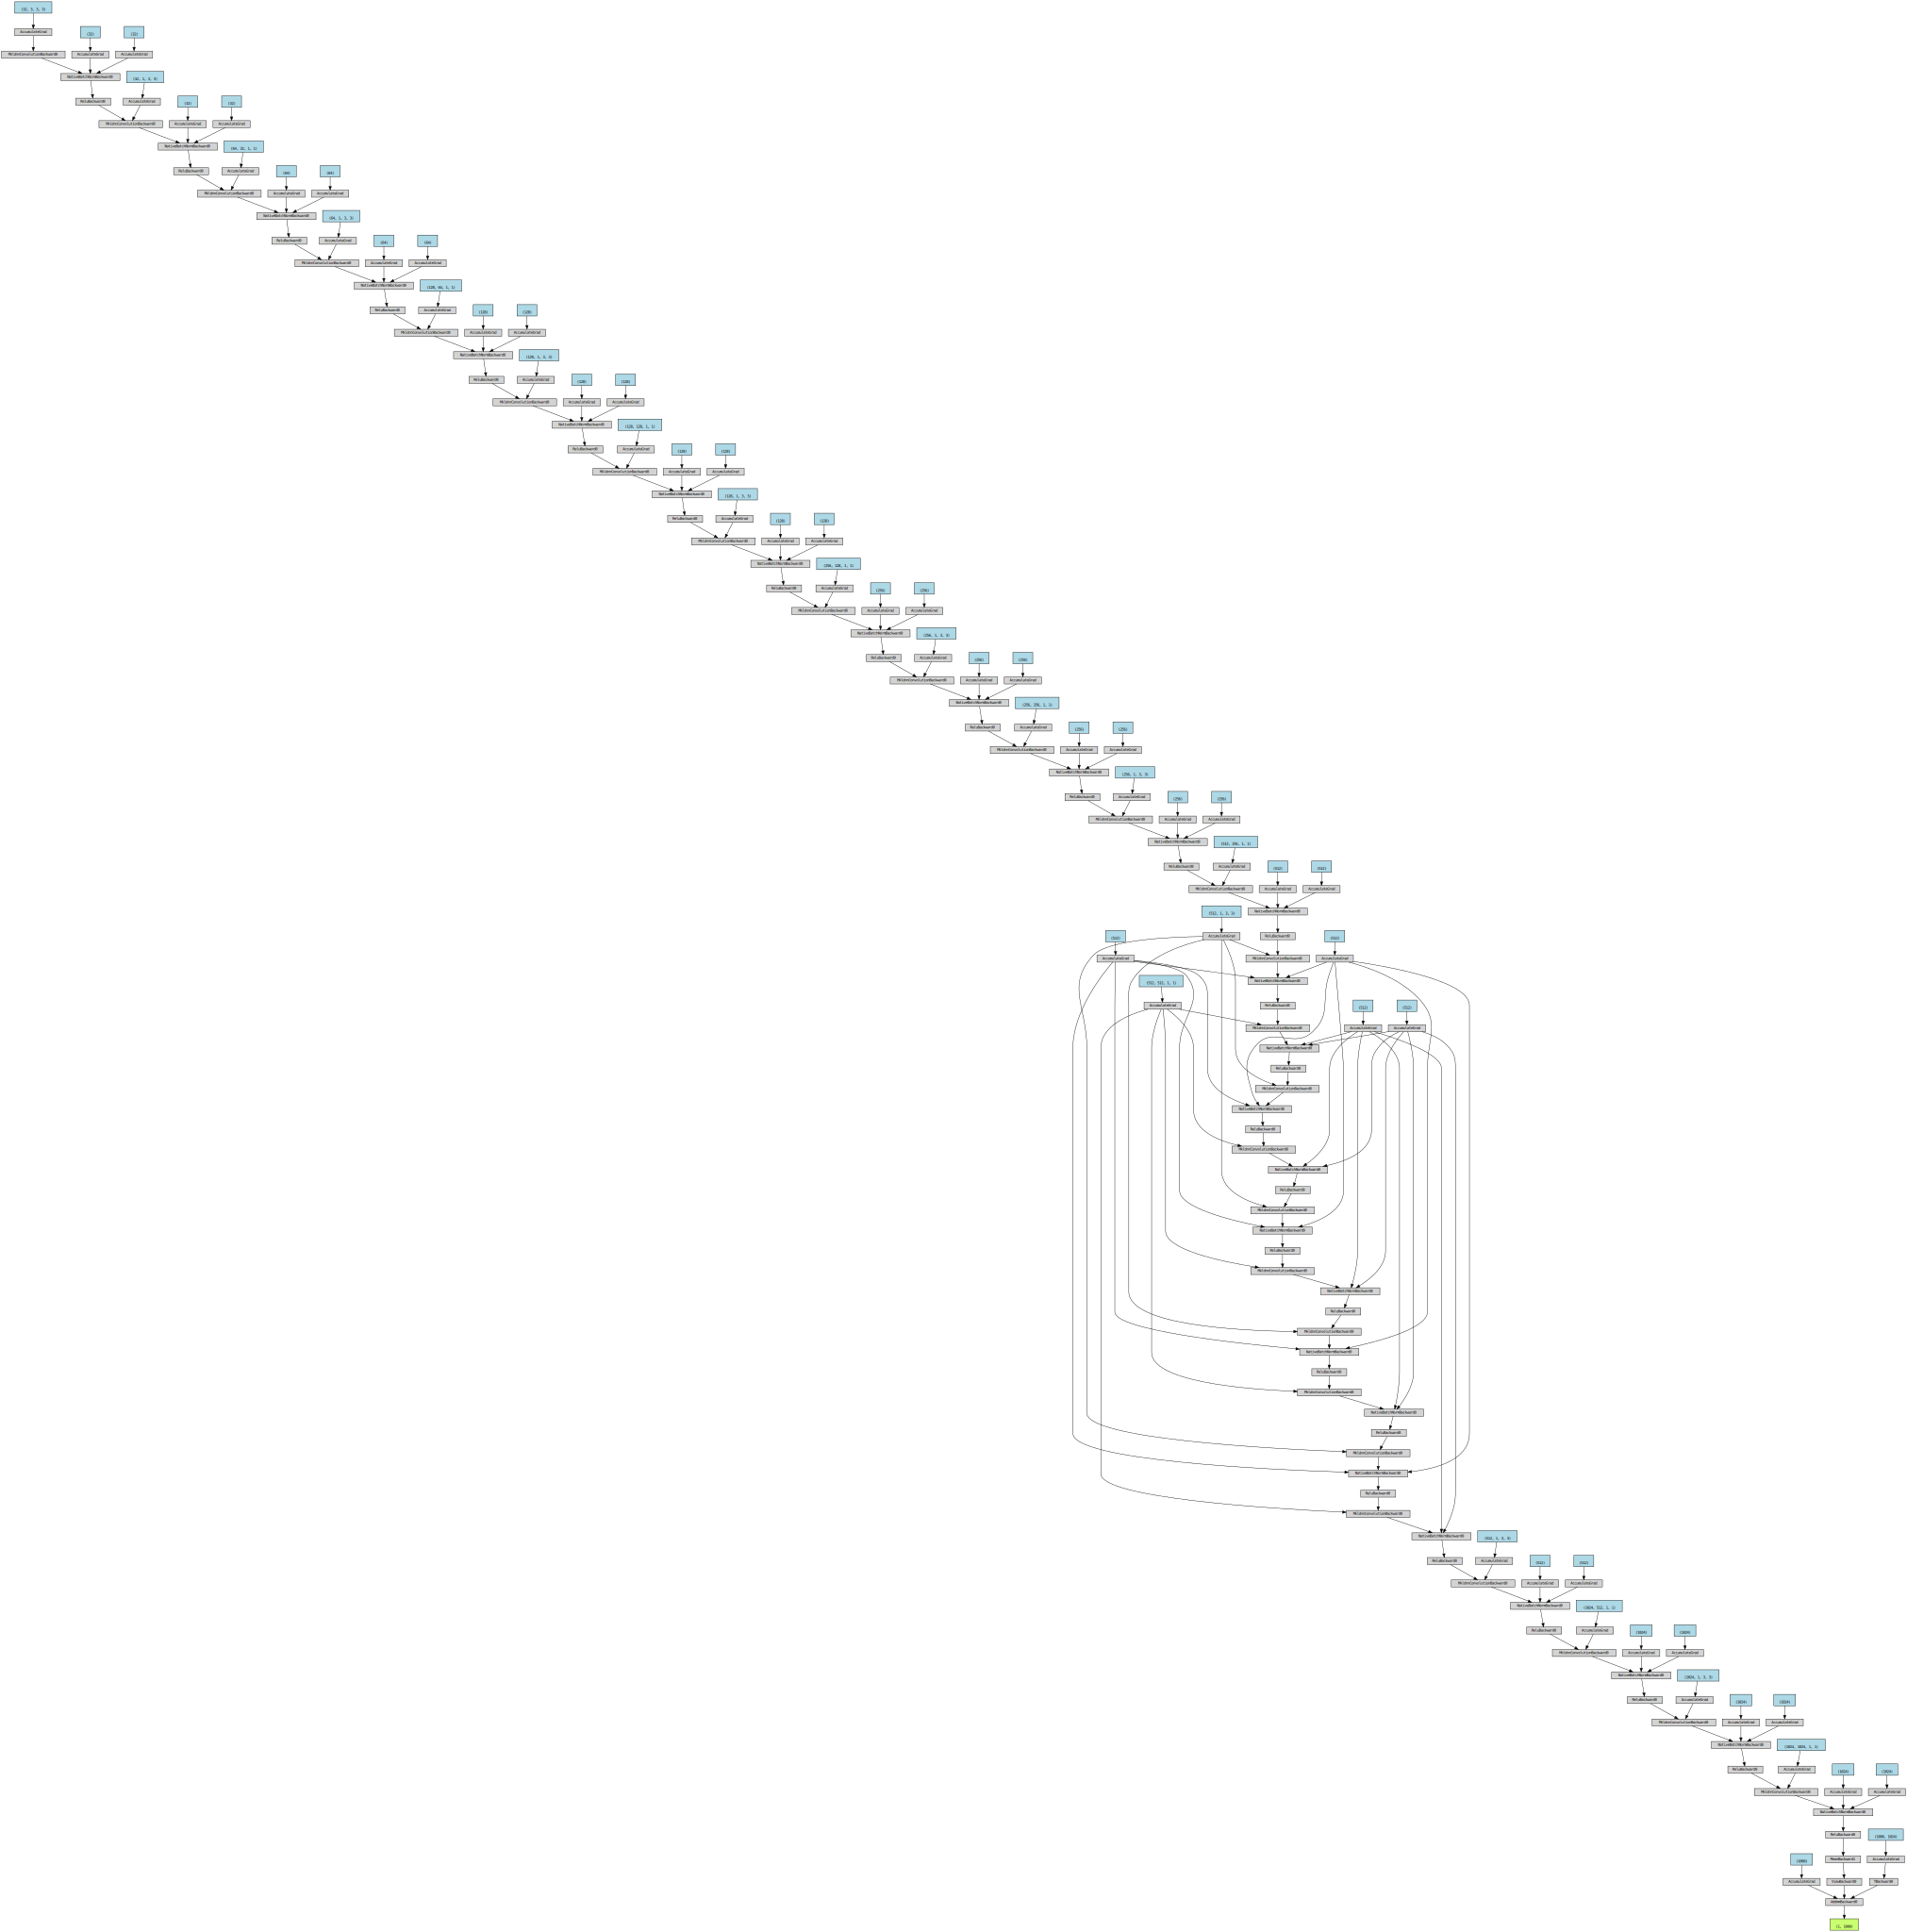

In [5]:
from torchviz import make_dot

x = torch.randn(1, 3, 224, 224)

model_1_cpu = Mobilenet()
model_1_cpu_out = model_1_cpu(x)

#g = make_dot(out, params=None)
#g.view()
make_dot(model_1_cpu_out, params = None)

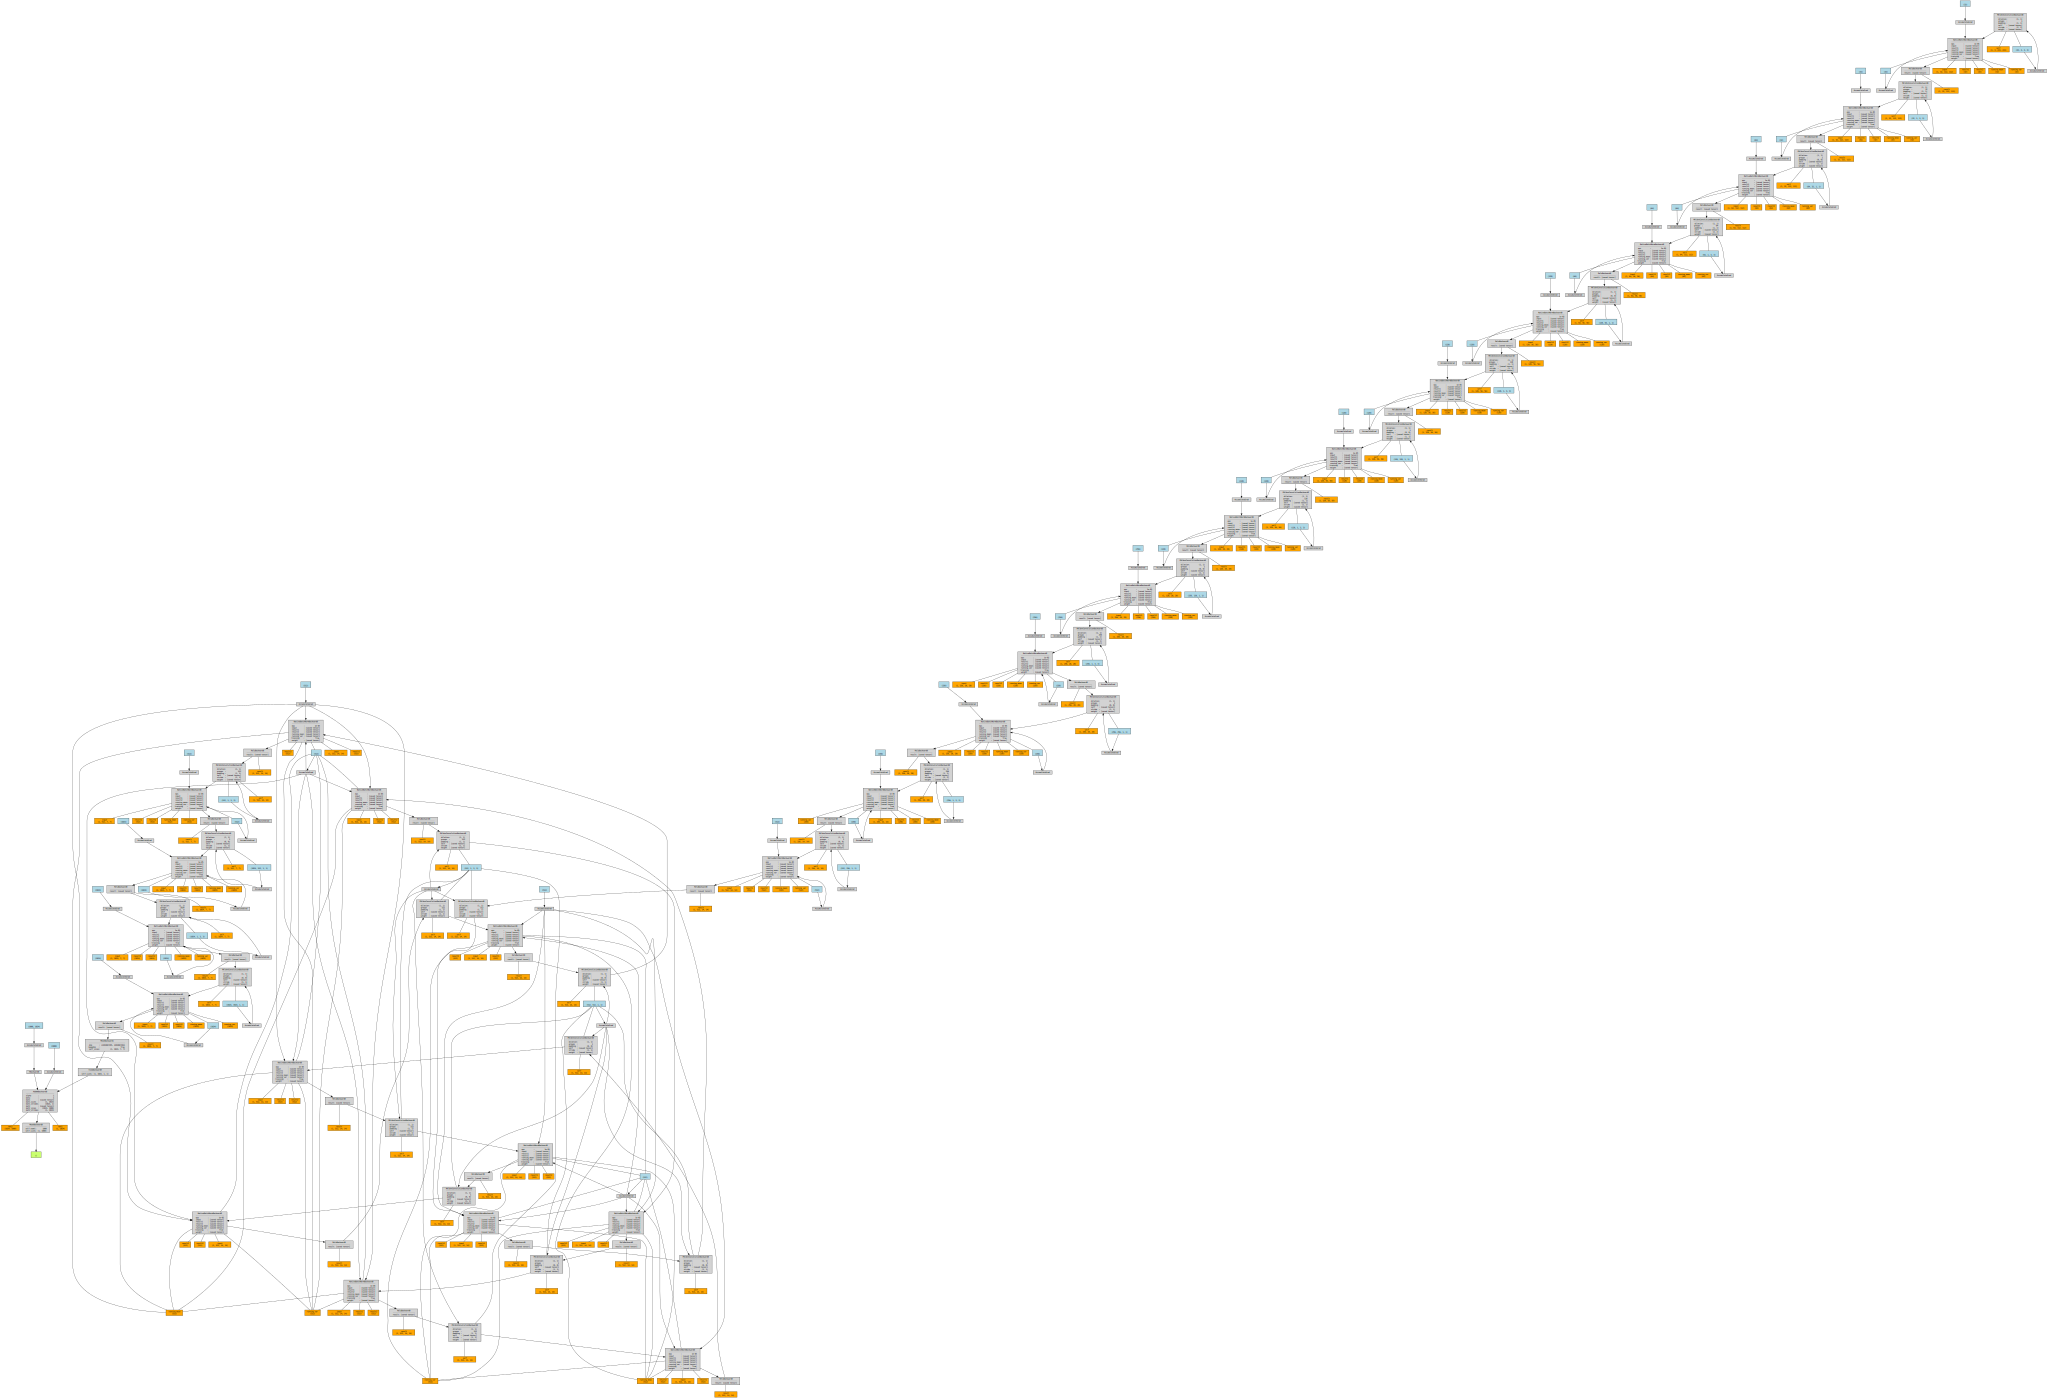

In [6]:
make_dot(model_1_cpu_out.mean(), params = None, show_attrs = True, show_saved = True)